In [9]:
import os
import sys
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# in order to recognize the utils, I had to add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
#used for saving plots!
output_dir = os.path.join(project_root, "plots")


if project_root not in sys.path:
    sys.path.append(project_root)


from utils.preprocessing_utils import *
from utils.file_reader_utils import Reader


In [10]:
# Openning and loading the config file
#NOTEEE! Remember that Jupyter caches the config file so everytime you update the config file, reload it!
config_path = os.path.join(project_root, 'configs', 'prep_config.json')

with open(config_path, 'r') as config_file:
    config = json.load(config_file)


#Reading the file!
reader = Reader()

#buildin the full path to the dataset using the project root
data_path = os.path.join(project_root, config['data_path'])
df = reader.read(data_path)

# we keep updating df_cleaned
df_cleaned = df.copy()

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)         
pd.set_option('display.max_rows', 50)       

df.tail(20)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,NaN,129912,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [11]:
#Summary Statistic analysis (to better understand the dataset, and to start identifying possible errors and issues present in the dataset.)
print("for numerical attributes:\n")
display(df_cleaned.describe())

print("for categorical attributes:\n")
df_cleaned.describe(include=[object])

for numerical attributes:



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


for categorical attributes:



,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


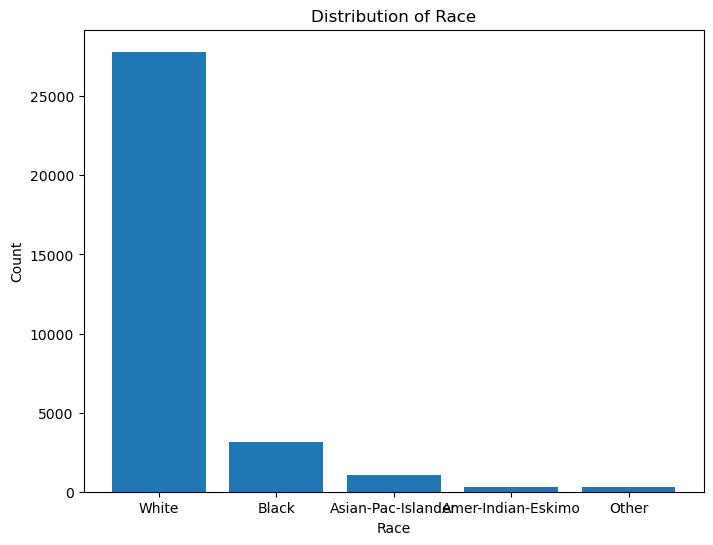

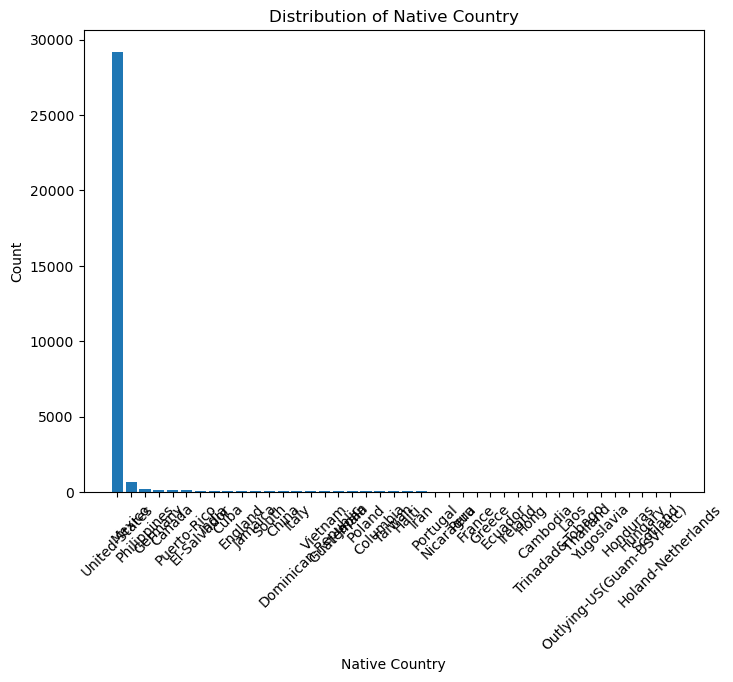

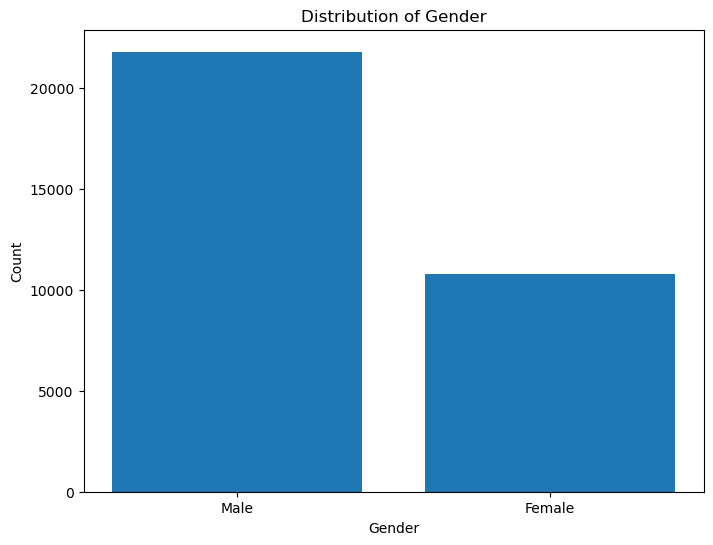

In [12]:
#let's plot some protected attribute for better visualization and possible discrimination!

# Distribution for "Race" column
race_counts = df['race'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(race_counts.index, race_counts.values)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.savefig(os.path.join(output_dir, "Distribution_of_Race.png"))
plt.show()
plt.close()

# Distribution for "Native Country" column
native_counts = df['native-country'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(native_counts.index, native_counts.values)
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Distribution of Native Country')
plt.xticks(rotation=45)  #we rotate labels because there are many countries and there are long names!
plt.savefig(os.path.join(output_dir, "Distribution_of_Native_Country.png"))
plt.show()
plt.close()

# Distribution for "Gender" column
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.savefig(os.path.join(output_dir, "Distribution_of_Gender.png"))
plt.show()
plt.close()


In [ ]:
#Preprocessing

df_cleaned = check_and_strip_spaces(df_cleaned, fix=True, print_summary=True)
df_cleaned = standardize_missing_values(df_cleaned, config=config, print_summary=True)
df_cleaned = convert_numeric_objects(df_cleaned) 
df_cleaned = remove_duplicates(df_cleaned, normalize_text=True, print_summary=True)
df_cleaned = drop_irrelevant_features(df_cleaned, config=config, print_summary=True)
df_cleaned = discretize_from_config(df_cleaned, config=config, print_summary=True, drop_original=True)

print (f"size is {len(df_cleaned)}")
display(df_cleaned.head(15))


size is 32537


,workclass,education,education-num,race,sex,native-country,income,age_range,hours-per-week_range
0,state-gov,bachelors,13,white,male,united-states,<=50k,30-45,21-40
1,self-emp-not-inc,bachelors,13,white,male,united-states,<=50k,45-60,0-20
2,private,hs-grad,9,white,male,united-states,<=50k,30-45,21-40
3,private,11th,7,black,male,united-states,<=50k,45-60,21-40
4,private,bachelors,13,black,female,cuba,<=50k,15-30,21-40
5,private,masters,14,white,female,united-states,<=50k,30-45,21-40
6,private,9th,5,black,female,jamaica,<=50k,45-60,0-20
7,self-emp-not-inc,hs-grad,9,white,male,united-states,>50k,45-60,41-60
8,private,masters,14,white,female,united-states,>50k,30-45,41-60
9,private,bachelors,13,white,male,united-states,>50k,30-45,21-40


In [14]:
print (df[["education-num", "education"]].drop_duplicates().sort_values("education-num"))
#-------------------------------------TRY IT-------------------------------------------------------------
#Try to see if you can apply semantic column detection! Hard to apply/ not 100% reliable but give it a shot!
# categorical columns to numeric transform/ optimization/ correlation matrix!


     education-num     education
224              1     Preschool
160              2       1st-4th
56               3       5th-6th
15               4       7th-8th
6                5           9th
77               6          10th
3                7          11th
415              8          12th
2                9       HS-grad
10              10  Some-college
14              11     Assoc-voc
13              12    Assoc-acdm
0               13     Bachelors
5               14       Masters
52              15   Prof-school
20              16     Doctorate


C:\Users\deart\AppData\Local\Temp\ipykernel_10636\2406755636.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


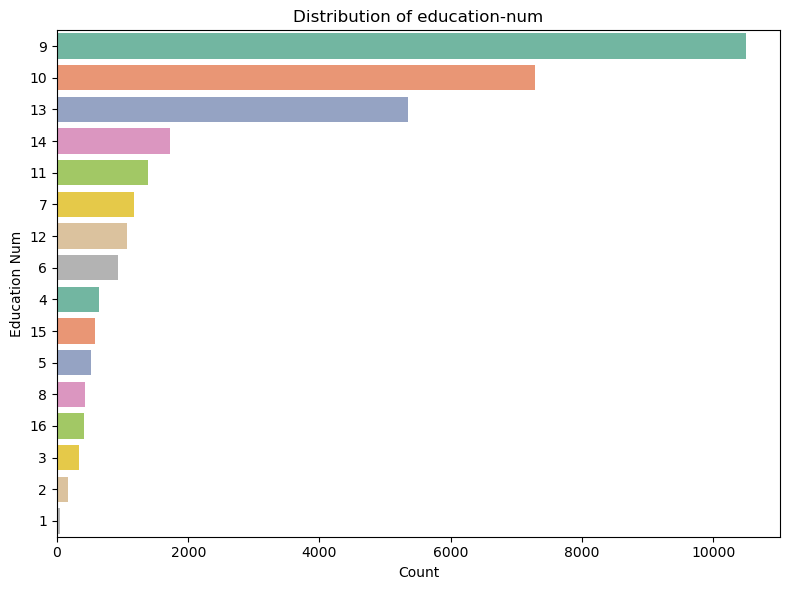

C:\Users\deart\AppData\Local\Temp\ipykernel_10636\2406755636.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_counts.values, y=edu_counts.index, palette="viridis")


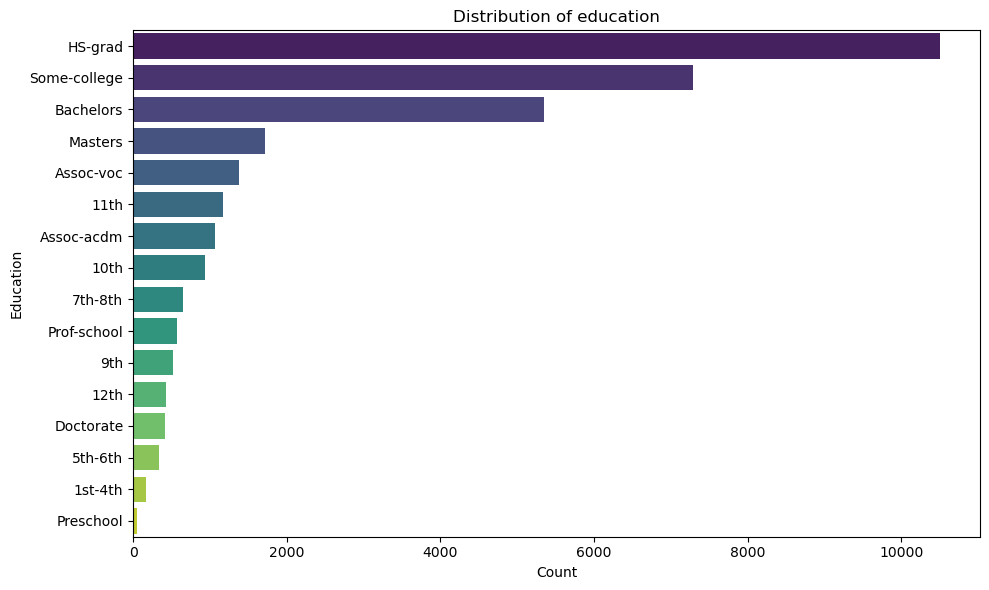

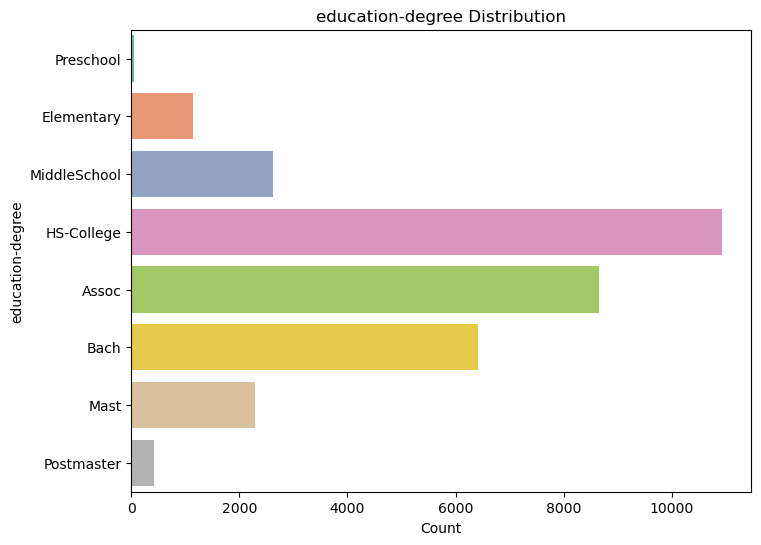

,workclass,race,sex,native-country,income,age_range,hours-per-week_range,education-degree
0,state-gov,white,male,united-states,<=50k,30-45,21-40,Bach
1,self-emp-not-inc,white,male,united-states,<=50k,45-60,0-20,Bach
2,private,white,male,united-states,<=50k,30-45,21-40,HS-College
3,private,black,male,united-states,<=50k,45-60,21-40,MiddleSchool
4,private,black,female,cuba,<=50k,15-30,21-40,Bach


In [15]:
#plotting! "Adult" Data set specific!

# education-num column plot
sorted_edu_num = df_cleaned['education-num'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(8, 6))
sns.countplot(
    y='education-num',
    data=df_cleaned,
    order=sorted_edu_num,
    palette='Set2'
)
plt.title("Distribution of education-num")
plt.xlabel("Count")
plt.ylabel("Education Num")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "distribution_of_education_num.png"))
plt.show()
plt.close()


# education column plot
edu_counts = df['education'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=edu_counts.values, y=edu_counts.index, palette="viridis")
plt.title("Distribution of education")
plt.xlabel("Count")
plt.ylabel("Education")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "distribution_of_education.png"))
plt.show()
plt.close()

# defining the bins and corresponding labels
#-----------------------------------------------------MOVE IT TO CONFIG------------------------------------------------
bins = [1, 2, 5, 8, 10, 12, 14, 16, np.inf]
labels = [
    'Preschool',      # it covers education_num = 1
    'Elementary',     # it covers education_num in [2..4]
    'MiddleSchool',   # it covers education_num in [5..7]
    'HS-College',     # it covers education_num in [8..9]
    'Assoc',          # it covers education_num in [10..11]
    'Bach',           # it covers education_num in [12..13]
    'Mast',           # it covers education_num in [14..15]
    'Postmaster'      # it covers education_num >= 16
]

# Creating a new categorical column named 'education_degree'
df_cleaned['education-degree'] = pd.cut(
    df_cleaned['education-num'],
    bins=bins,
    labels=labels,
    right=False  # left-closed, right-open intervals
)


plt.figure(figsize=(8, 6))

# Ensuring the order matches the labels list so the bars appear in the correct order
sns.countplot(
    y='education-degree',
    data=df_cleaned,
    order=labels,       # the same order as label list
    palette='Set2',     # optional color palette
    hue = 'education-degree' #we use it to avoid getting the wawrning about palette deprecation with no hue!

)

plt.title("education-degree Distribution")
plt.xlabel("Count")
plt.ylabel("education-degree")
plt.savefig(os.path.join(output_dir, "education_degree_distribution.png"))
plt.show()
plt.close() 



df_cleaned.drop(columns=['education-num', 'education'], inplace=True)
df_cleaned.head()

In [16]:
# Save preprocessed dataframe to CSV because CFDDiscovery algorithm needs a csv file as input!

csv_path_for_cfd = os.path.join(project_root, 'outputs', 'cleaned_data_for_cfd.csv')
df_cleaned.to_csv(csv_path_for_cfd, index=False)
